# IMPORTS

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from scipy.interpolate import make_interp_spline

import seaborn as sns

# Preparação dos Dados

## Carregamento do Dataset

In [78]:
df = pd.read_csv("diabetes_health_indicators_label.csv")

In [79]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## Dicionário de Variáveis



| Variable Name | Role    | Type   | Description                                                                                                              | Units | Missing Values |
|---------------|---------|--------|--------------------------------------------------------------------------------------------------------------------------|-------|----------------|
| ID            | ID      | Integer| Patient ID                                                                                                               |       | no             |
| Diabetes_binary | Target | Binary | 0 = no diabetes, 1 = prediabetes or diabetes                                                                             |       | no             |
| HighBP        | Feature | Binary | 0 = no high BP, 1 = high BP                                                                                              |       | no             |
| HighChol      | Feature | Binary | 0 = no high cholesterol, 1 = high cholesterol                                                                              |       | no             |
| CholCheck     | Feature | Binary | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                               |       | no             |
| BMI           | Feature | Integer| Body Mass Index                                                                                                          |       | no             |
| Smoker        | Feature | Binary | Smoked at least 100 cigarettes in life (0 = no, 1 = yes)                                                                 |       | no             |
| Stroke        | Feature | Binary | Ever told you had a stroke (0 = no, 1 = yes)                                                                             |       | no             |
| HeartDiseaseorAttack | Feature | Binary | Coronary heart disease or myocardial infarction (0 = no, 1 = yes)                                                     |       | no             |
| PhysActivity  | Feature | Binary | Physical activity in past 30 days (excluding job) (0 = no, 1 = yes)                                                      |       | no             |
| Fruits        | Feature | Binary | Consume fruit 1+ times per day (0 = no, 1 = yes)                                                                         |       | no             |
| Veggies       | Feature | Binary | Consume vegetables 1+ times per day (0 = no, 1 = yes)                                                                    |       | no             |
| HvyAlcoholConsump | Feature | Binary | Heavy drinking (men >14 drinks/week, women >7 drinks/week) (0 = no, 1 = yes)                                            |       | no             |
| AnyHealthcare | Feature | Binary | Any kind of health care coverage (0 = no, 1 = yes)                                                                       |       | no             |
| NoDocbcCost   | Feature | Binary | Could not see a doctor due to cost in past 12 months (0 = no, 1 = yes)                                                   |       | no             |
| GenHlth       | Feature | Integer| General health rating (1-5: 1=excellent ... 5=poor)                                                                      |       | no             |
| MentHlth      | Feature | Integer| Days mental health not good in past 30 days (0-30)                                                                        | days  | no             |
| PhysHlth      | Feature | Integer| Days physical health not good in past 30 days (0-30)                                                                      | days  | no             |
| DiffWalk      | Feature | Binary | Serious difficulty walking or climbing stairs (0 = no, 1 = yes)                                                          |       | no             |
| Sex           | Feature | Binary | Sex (0 = female, 1 = male)                                                                                                |       | no             |
| Age           | Feature | Integer| 13-level age category (_AGEG5YR) (e.g., 1 = 18-24 ... 13 = 80 or older)                                                   |       | no             |
| Education     | Feature | Integer| Education level (1-6: 1 = never attended ... 6 = college graduate)                                                       |       | no             |
| Income        | Feature | Integer| Income scale (1-8, e.g., 1 = < $10,000 ... 8 = $75,000 or more)                                                           |       | no             |

# Pré-processamento dos Dados

## Tratamento de Valores Ausentes

In [81]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Nenhum valor ausente foi encontrado na base de dados.

## Normalização e Padronização

In [82]:
scaler = MinMaxScaler()

# Normalizadando as colunas não binarias ( 'BMI', 'MentHlth', 'PhysHlth', 'GenHlth' )

cols_to_normalize = ['BMI', 'MentHlth', 'PhysHlth', 'GenHlth']
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

## Renomeação da Label

In [100]:
# Renomear coluna 'Diabetes_binary' para 'Target'
df.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)  

# Análise Exploratória (EDA)

## Distribuição das Variáveis

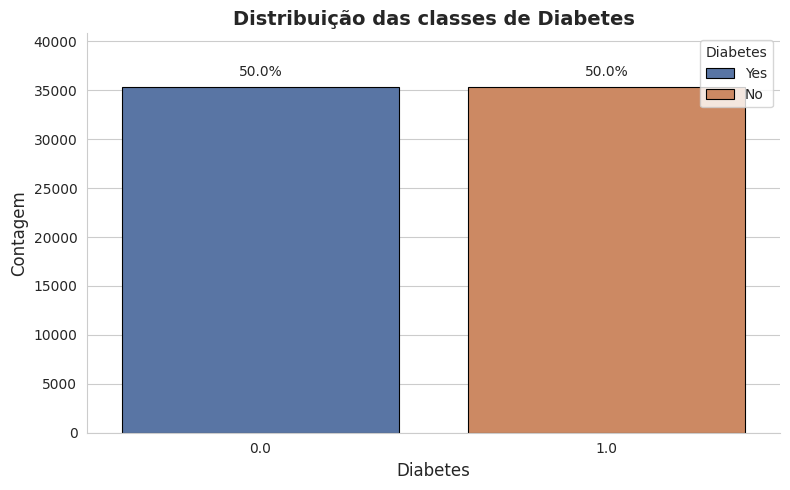

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='Diabetes', data=df, hue='Diabetes',
    palette=['#4c72b0', '#dd8452'],
    edgecolor='k', linewidth=0.8
)

# labels and title
ax.set_title('Distribuição das classes de Diabetes', fontsize=14, fontweight='bold')
ax.set_xlabel('Diabetes', fontsize=12)
ax.set_ylabel('Contagem', fontsize=12)

# ajustar limite y para espaço para anotações
ylim = ax.get_ylim()
ax.set_ylim(0, ylim[1] * 1.10)

# anotar contagens e percentuais em cada barra (ignora barras com altura 0)
total = len(df)
for p in ax.patches:
    height = p.get_height()
    if height <= 0:
        continue
    pct = 100 * height / total
    ax.annotate(f'{pct:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=10, fontweight='medium',
                xytext=(0,6), textcoords='offset points')

sns.despine(left=False, bottom=False)
plt.legend(title='Diabetes', labels=['Yes', 'No'])
plt.tight_layout()
plt.show()

## Correlação Entre Variáveis

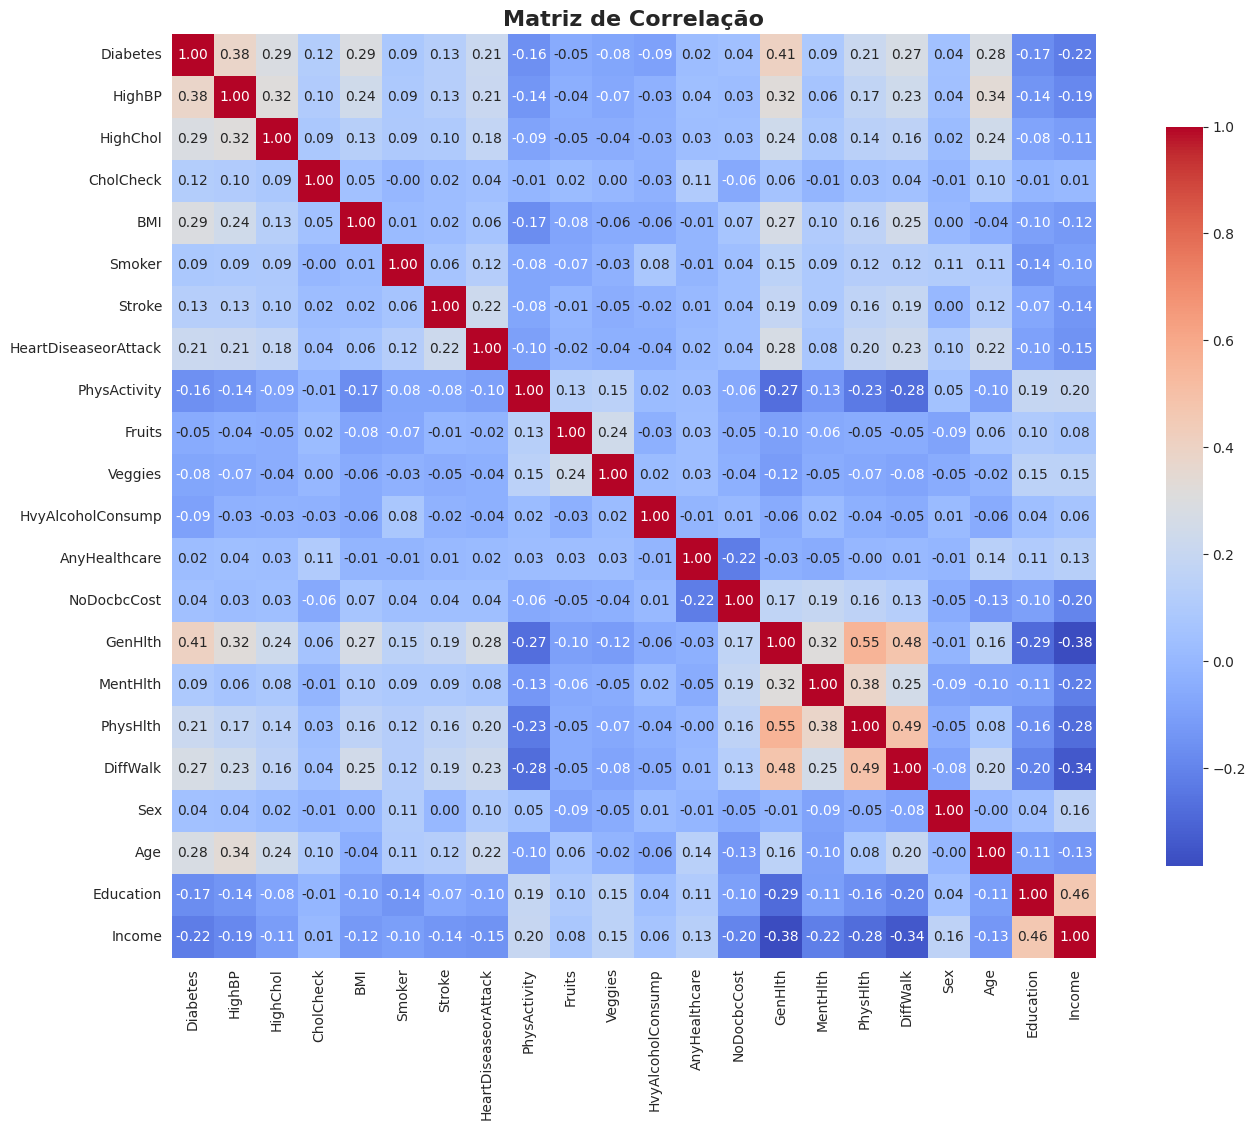

In [101]:
plt.figure(figsize=(18,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlação', fontsize=16, fontweight='bold')
plt.show()

### Melhores Correlações Com 'Diabetes'

In [102]:
correlation_with_target = correlation_matrix['Diabetes'].sort_values(ascending=False)
# Features mais correlacionadas com a variável alvo
selected_features = correlation_with_target.index[1:11]
correlation_with_target[1:11] 

GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
Name: Diabetes, dtype: float64

# Modelagem

## Divisão Treino/Teste

### Separação (X) e (y)

In [ ]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

### Split dos Dados em Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Seleção de Features

In [ ]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Treinamento do Modelo

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_fist_pred = knn.predict(X_test)

## Validação Cruzada com K-Fold Estratificado

In [ ]:
k_values = range(1, 21)
cv = StratifiedKFold(n_splits=10)

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
    accuracies.append(scores.mean())

best_k = k_values[accuracies.index(max(accuracies))]
print("Melhor K =", best_k)
print("Acurácia média =", max(accuracies))


Melhor K = 19
Acurácia média = 0.7201239889767123


### Novo Treino com o Melhor k

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


# Avaliação dos Modelos

## Curva ROC e AUC

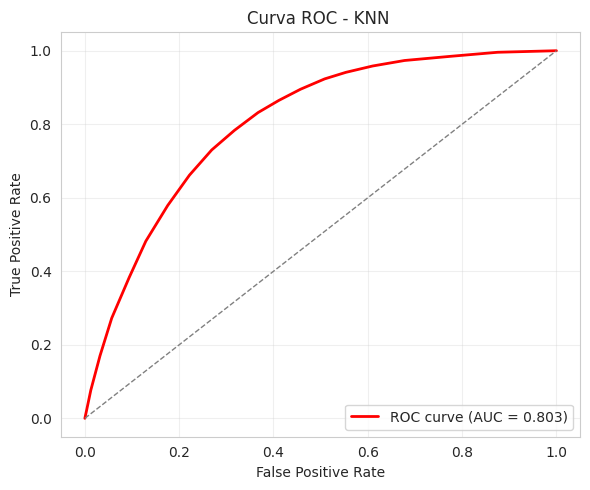

In [ ]:
# Curva ROC original
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - KNN ')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Matriz de Confusão

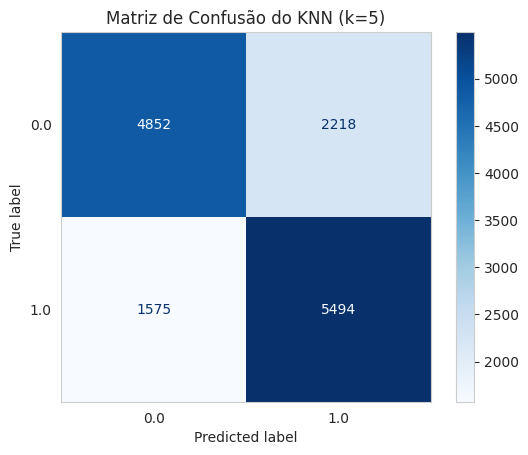

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão do KNN (k=5)')
plt.grid(False) 
plt.show()

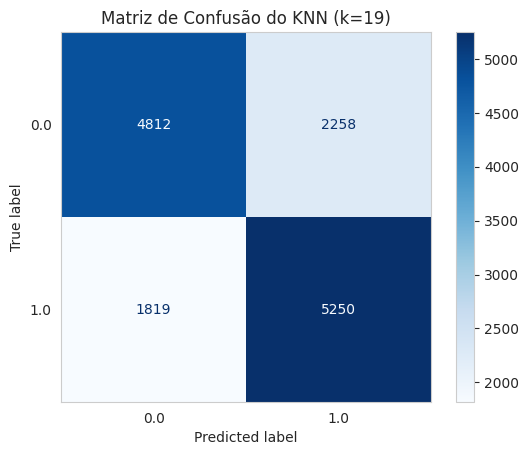

In [ ]:
cm = confusion_matrix(y_test, y_pred=y_fist_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão do KNN (k={best_k})')
plt.grid(False)  
plt.show()

## Métricas: Acuracia, Precision, Recall e f1-score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:8.4f}')
print(f'F1-Score: {f1:.4f}')

Acurácia: 0.7331
Precisão: 0.7117
Recall:   0.7834
F1-Score: 0.7459


## Distribuição das Features por Classe

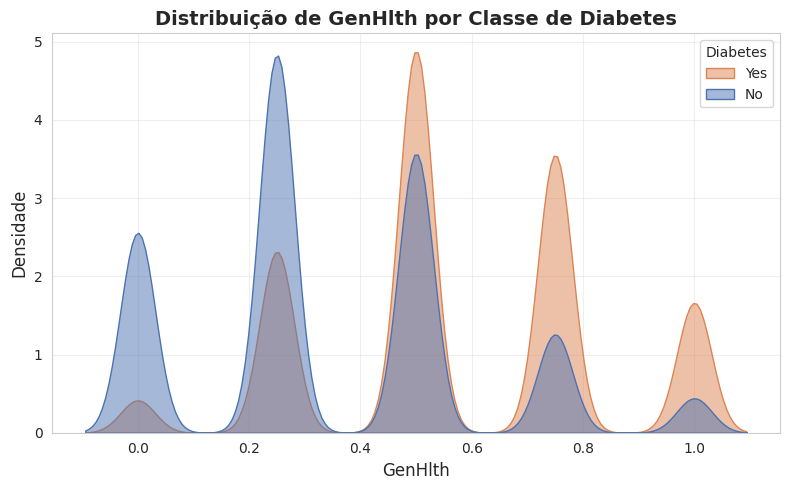

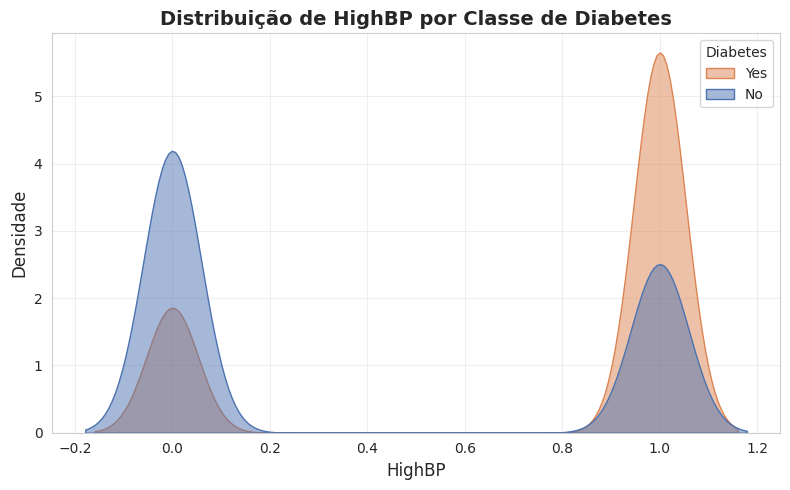

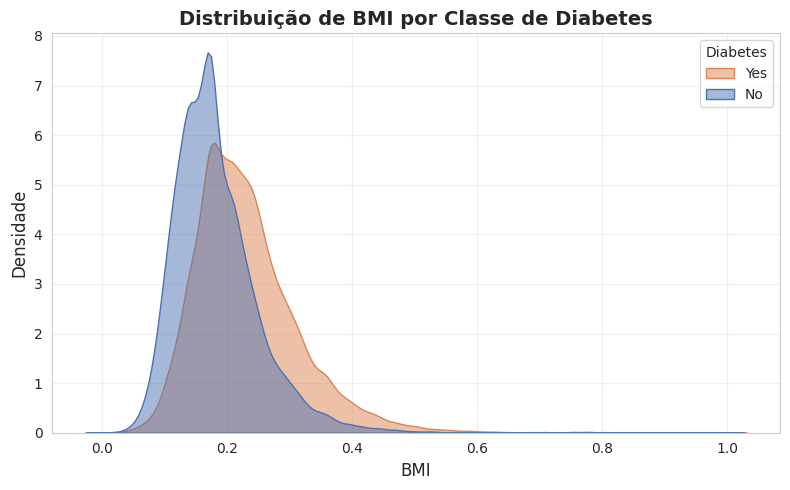

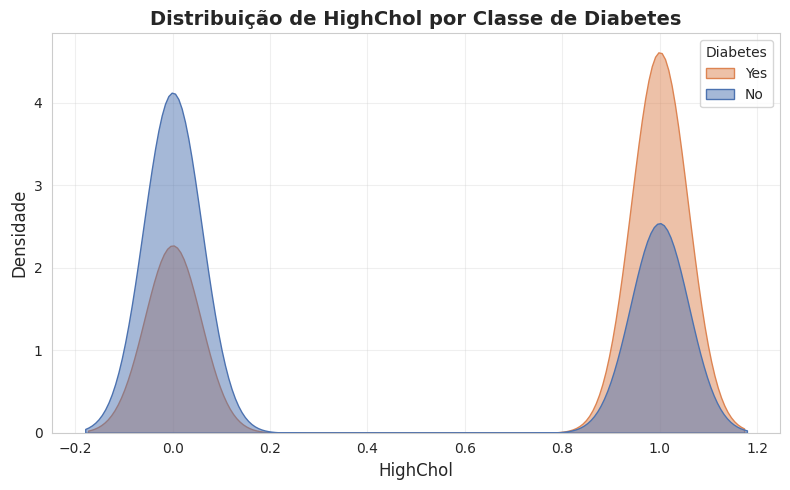

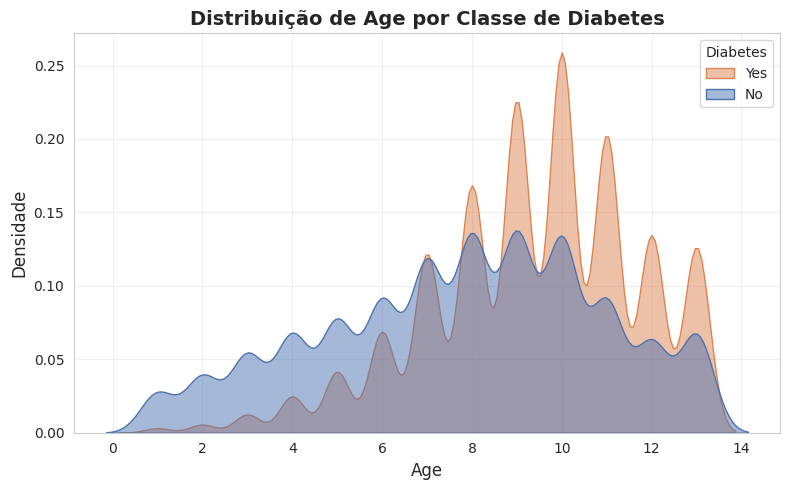

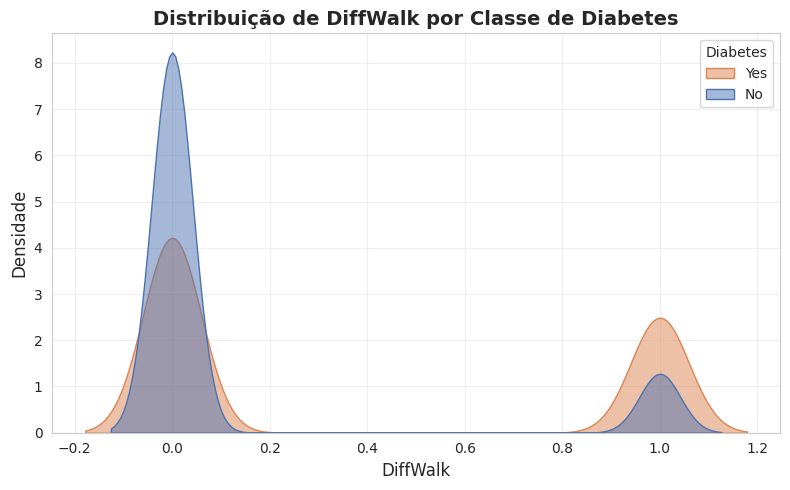

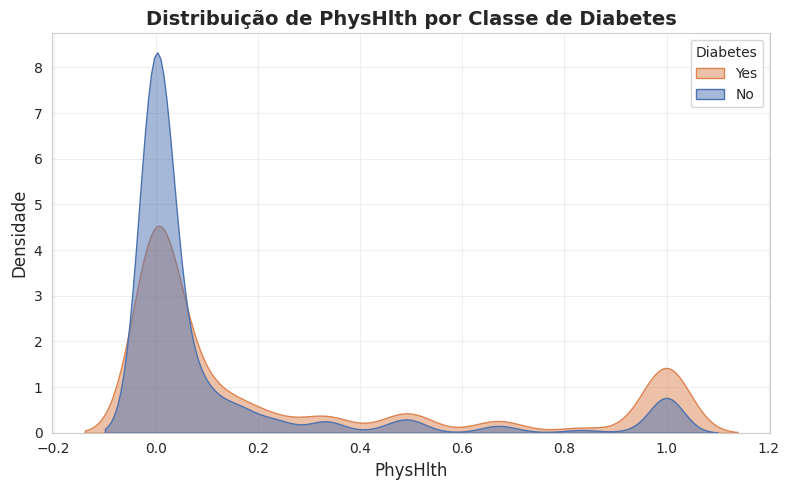

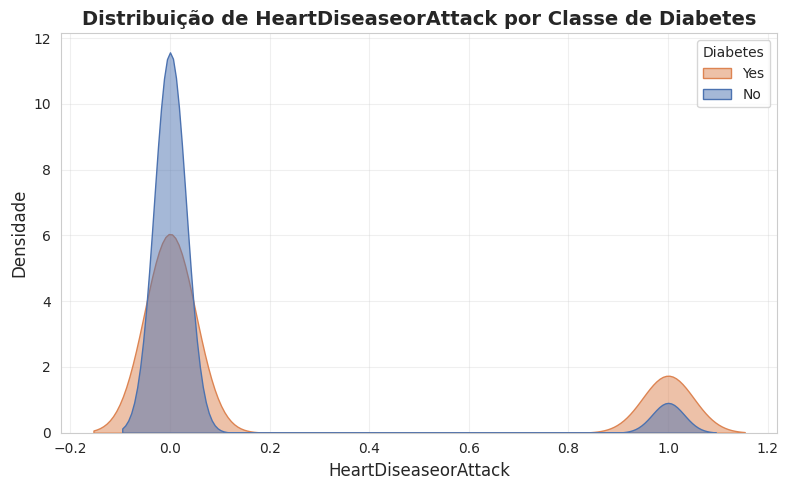

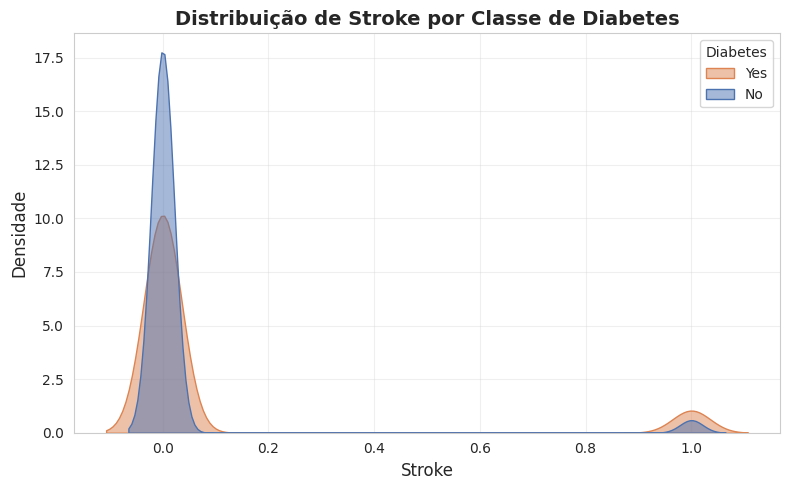

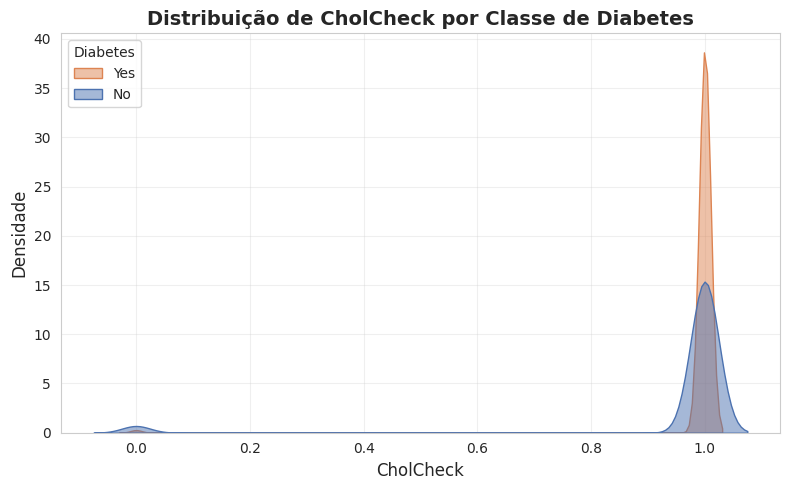

In [ ]:
# distribuição das features por classe > 25%
for feature in selected_features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=feature, hue='Diabetes', fill=True, legend=False, common_norm=False,
                palette=['#4c72b0', '#dd8452'], alpha=0.5)
    plt.title(f'Distribuição de {feature} por Classe de Diabetes', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Densidade', fontsize=12)
    plt.legend(title='Diabetes', labels=['Yes', 'No'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()